#### Quality Flags & SMAP Data

* Retrieval Quality Flag [combines all surface flags]
* Surface Quality Flag [provides information on why certain area might be flagged]


In [1]:
import datetime as dt
import glob
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
home_dir = os.getcwd(); #<--- we are going to use this to navigate back to where this script is saved

/home/trst2284/miniconda3/envs/smap/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


    Read in SMAP data for level 3 dataset for this example

In [2]:
os.chdir('Data/L3_SM_P/')
L3_SM_P_dir = os.getcwd();
flist = glob.glob('*.h5')
filename = flist[0]; 

    Current working directory:	YOURCOMPPATH/CUAHSI_NASA_2017/Demo/Data/L3_SM_P

    File we are using:		    SMAP_L3_SM_P_20170301_R14010_001.h5


Ok now lets read in variables: soil_moisture, 

In [3]:
f = h5py.File(filename, 'r')
group_id = 'Soil_Moisture_Retrieval_Data_AM'
var_id = list(f[group_id].keys())[16] # soil_moisture
sm_data = f[group_id][var_id][:,:]
surf_flag_L3_P = f[group_id]['surface_flag'][:,:]

    data are returned as <type 'numpy.ndarray'> something easy to work with in python.


Lets look at the two masks:

**Retrieval Flags**

To clear up any confusion from the workshop on quality masking:

I used over-simplified approaches to applying quality flags within the demo scripts that were hasty.
Below are better documented directions to applying the recommended quality flags for SMAP data.

Here I show the recommended quality flag from SMAP

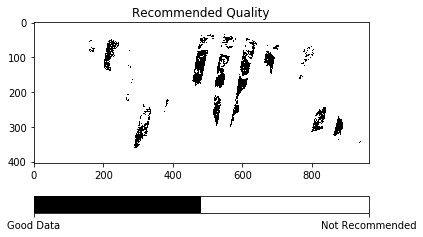

In [4]:
# Grab the Retrieval Quality Variable
ret_flag_L3_P = f[group_id]['retrieval_qual_flag'][:,:]
# Create a definition for the retrieval flags
ret_flags = {
    0:'Recommended Quality',
    1:'Retrieval Attempted',
    2:'Retrieval Successful',
    3:'Undefined'
}
# SMAP RECOMMENDED QUALITY BIT IS 0
fig, ax = plt.subplots()

cax = ax.imshow((ret_flag_L3_P>>0)&1, cmap=plt.cm.get_cmap('bone', 2))
ax.set_title(ret_flags[0])

cbar = fig.colorbar(cax, ticks=[0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Good Data', 'Not Recommended'])  # horizontal colorbar

plt.show()


Areas above with 0 value [black regions] are data of recommended quality.

**Surface Flags**

In [5]:
surf_flags = {
    0:'Static water',
    1:'Radar-derived Water Fraction',
    2:'Coastal Proximity',
    3:'Urban Area',
    4:'Precipitation',
    5:'Snow',
    6:'Ice',
    7:'Frozen Ground (model)',
    8:'Frozen Ground (radar)',
    9:'Mountainous Terrain',
    10:'Dense Vegetation',
    11:'Nadir Region',
    12:'Undefined'
}

* Based off the above recommended quality flags above the surface flags that inhibit recommende quality are as follows.  
* Black areas show no flag, white areas show where flagged data occcur.

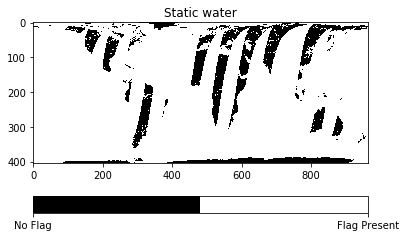

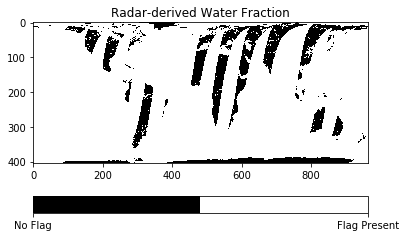

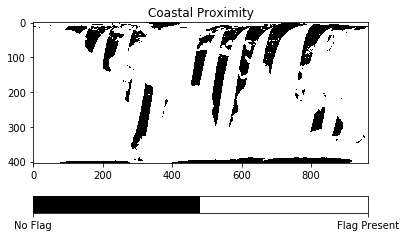

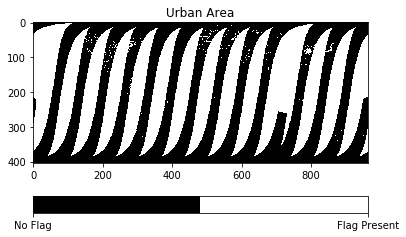

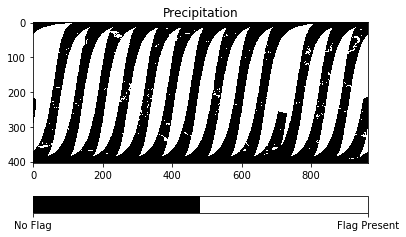

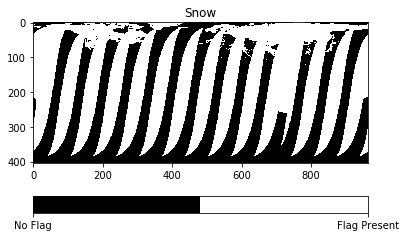

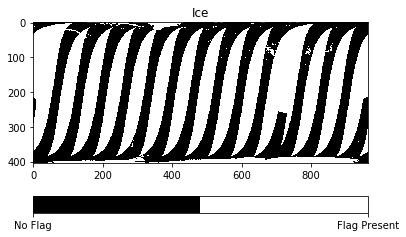

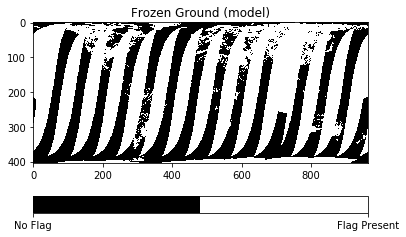

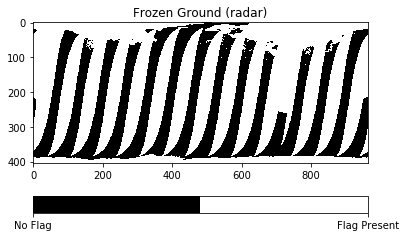

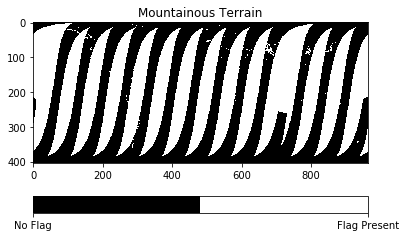

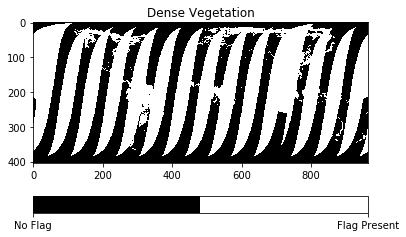

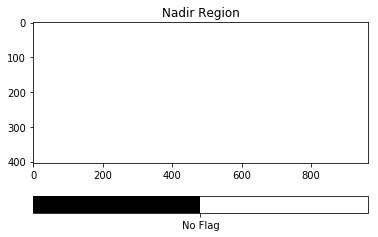

In [6]:
for i in np.arange(0,12):
    fig, ax = plt.subplots()
    cax = ax.imshow((surf_flag_L3_P>>i)&1, cmap=plt.cm.get_cmap('bone', 2))
    ax.set_title(surf_flags[i])
    cbar = fig.colorbar(cax, ticks=[0, 1], orientation='horizontal')
    cbar.ax.set_xticklabels(['No Flag', 'Flag Present'])  # horizontal colorbar
    plt.show()